In [ ]:
# Import a python file from a folder in the upper directory
import sys
sys.path.append('../')
import mystoi

# Do i have to reset the path after importing the file?
sys.path.remove('../')

In [2]:
# Audio files to import
spin_file_path = r"C:\Users\George\Desktop\Automatic Control and Robotics\Semester 7\Thesis\Datasets and other Downloads\clarity_CPC1_data.test.v1\clarity_CPC1_data\clarity_data\HA_outputs\test\S08520_L0216_E001.wav"
target_file_path = r"C:\Users\George\Desktop\Automatic Control and Robotics\Semester 7\Thesis\Datasets and other Downloads\clarity_CPC1_data.test.v1\clarity_CPC1_data\clarity_data\scenes\S08520_target_anechoic.wav"


In [5]:
import soundfile as sf
# Opening audio files using soundfile
spin, spin_sr = sf.read(spin_file_path)
target, target_sr = sf.read(target_file_path)

new_sr = 10000

In [6]:
from scipy.signal import resample

spin_resampled = resample(spin, int(len(spin) * new_sr / spin_sr))   # NOTE - current_no_of_samples / current_sampling_rate is the duration of audio signal
target_resampled = resample(target, int(len(target) * new_sr / target_sr))

In [7]:
# Convert to mono
if len(spin.shape) == 2:
    spin_mono = spin.mean(axis=1)
    spin_resampled_mono = spin_resampled.mean(axis=1)
else:
    raise Exception("SPIN audio is not stereo.")
if len(target.shape) == 2:
    target_mono = target.mean(axis=1)
    target_resampled_mono = target_resampled.mean(axis=1)
else:
    raise Exception("Target audio is not stereo.")

In [9]:
clean_tf_bins, spin_tf_bins = mystoi.compute_stoi(target_resampled_mono, spin_resampled_mono, new_sr, return_tf_bins=True)

print("Shape of clean_tf_bins: ", clean_tf_bins.shape)
print("Shape of spin_tf_bins: ", spin_tf_bins.shape)

Shape of clean_tf_bins:  (15, 114)
Shape of spin_tf_bins:  (15, 114)


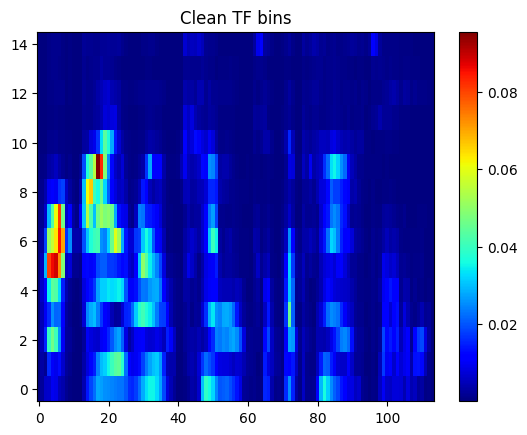

In [ ]:
# Visualize the tf bins
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.imshow(clean_tf_bins, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
plt.title("Clean TF bins")
plt.show()

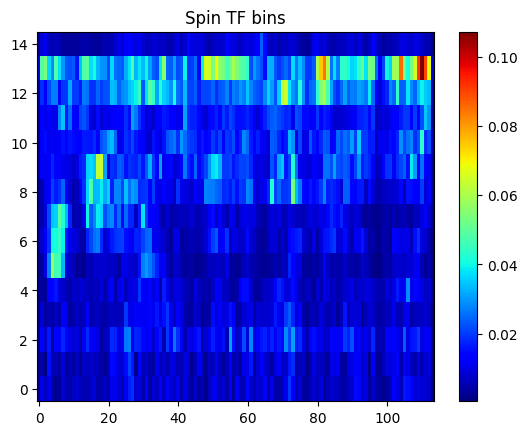

In [13]:
plt.imshow(spin_tf_bins, aspect='auto', origin='lower', cmap='jet')
plt.colorbar()
plt.title("Spin TF bins")
plt.show()